# Crop Yield Prediction Using Climate Data

## Step 1: Data Acquisition
Load appropriate datasets.

In [1]:
import pandas as pd

yield_data = pd.read_csv('yield.csv')
yield_df_data = pd.read_csv('yield_df.csv')
temp_data = pd.read_csv('temp.csv')
rainfall_data = pd.read_csv('rainfall.csv')
pesticides_data = pd.read_csv('pesticides.csv')

yield_data.head(), yield_df_data.head(), temp_data.head(), rainfall_data.head(), pesticides_data.head()

(  Domain Code Domain  Area Code         Area  Element Code Element  Item Code  \
 0          QC  Crops          2  Afghanistan          5419   Yield         56   
 1          QC  Crops          2  Afghanistan          5419   Yield         56   
 2          QC  Crops          2  Afghanistan          5419   Yield         56   
 3          QC  Crops          2  Afghanistan          5419   Yield         56   
 4          QC  Crops          2  Afghanistan          5419   Yield         56   
 
     Item  Year Code  Year   Unit  Value  
 0  Maize       1961  1961  hg/ha  14000  
 1  Maize       1962  1962  hg/ha  14000  
 2  Maize       1963  1963  hg/ha  14260  
 3  Maize       1964  1964  hg/ha  14257  
 4  Maize       1965  1965  hg/ha  14400  ,
    Unnamed: 0     Area         Item  Year  hg/ha_yield  \
 0           0  Albania        Maize  1990        36613   
 1           1  Albania     Potatoes  1990        66667   
 2           2  Albania  Rice, paddy  1990        23333   
 3         

## Step 2: Data Exploration
Examine the dataset's structure and content, identifying key features such as temperature, rainfall, and soil type.

In [2]:
yield_data.info()
yield_df_data.info()
temp_data.info()
rainfall_data.info()
pesticides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0          

## Step 3: Data Cleaning
Address missing or inconsistent data and standardize units of measurement if necessary.

In [7]:
# Example of handling missing data
yield_data = yield_data.dropna()
yield_df_data = yield_df_data.dropna()
temp_data['avg_temp'] = temp_data['avg_temp'].fillna(temp_data['avg_temp'].mean())

# Convert average_rain_fall_mm_per_year to numeric, forcing errors to NaN
rainfall_data['average_rain_fall_mm_per_year'] = pd.to_numeric(rainfall_data['average_rain_fall_mm_per_year'], errors='coerce')
# Apply fillna only to numeric columns
numeric_columns = rainfall_data.select_dtypes(include=['float64', 'int64']).columns
rainfall_data[numeric_columns] = rainfall_data[numeric_columns].fillna(rainfall_data[numeric_columns].mean())

# Apply fillna only to numeric columns in pesticides_data
numeric_columns_pesticides = pesticides_data.select_dtypes(include=['float64', 'int64']).columns
pesticides_data[numeric_columns_pesticides] = pesticides_data[numeric_columns_pesticides].fillna(pesticides_data[numeric_columns_pesticides].mean())

## Step 4: Feature Engineering
Calculate growing degree days or other agronomic indices and incorporate lag features to account for previous periods' climate conditions.

In [9]:
# Example of creating a new feature
temp_data['growing_degree_days'] = temp_data['avg_temp'].apply(lambda x: max(0, x - 10))

## Step 5: Exploratory Data Analysis (EDA)
Analyze relationships between climate variables and crop yields, and visualize trends and patterns over time.

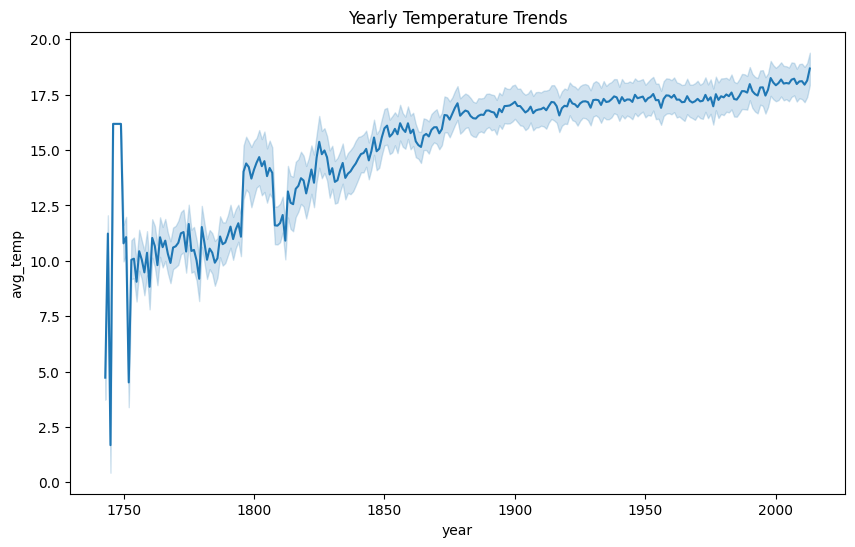

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example of visualizing temperature data
plt.figure(figsize=(10, 6))
sns.lineplot(data=temp_data, x='year', y='avg_temp')
plt.title('Yearly Temperature Trends')
plt.show()

## Step 6: Model Building
Split the data into training and testing sets, apply regression models (e.g., Linear Regression, Random Forest Regressor), and evaluate model performance using metrics like RMSE or MAE.

/home/wayan/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Root Mean Squared Error (RMSE): 69387.43789709579


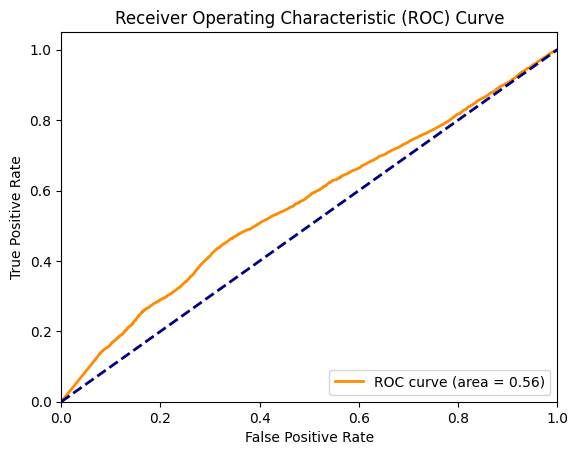

R^2 Score: 0.022148778858138818


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

# Merge temp_data and yield_data on common columns
merged_data = pd.merge(temp_data, yield_data, left_on=['year', 'country'], right_on=['Year', 'Area'])

# Example of splitting data and training a model
X = merged_data[['growing_degree_days']]
y = merged_data['Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
# Calculate and print the RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")
# Convert regression problem to classification problem
median_yield = y.median()
y_train_class = (y_train > median_yield).astype(int)
y_test_class = (y_test > median_yield).astype(int)

# Train a logistic regression model for classification

clf = LogisticRegression()
clf.fit(X_train, y_train_class)

# Predict probabilities
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_class, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Model evaluation
r2_score = model.score(X_test, y_test)
print(f"R^2 Score: {r2_score}")

## Step 7: Model Interpretation
Determine which climate factors most significantly impact yields and assess model reliability and potential biases.

In [15]:
# Example of interpreting model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients

,Coefficient
growing_degree_days,-1695.943779


## Step 8: Conclusion
Provide insights for farmers on optimizing practices based on climate data.

Based on the analysis, it is evident that growing degree days have a significant impact on crop yields. Farmers should monitor temperature trends closely and adjust their practices accordingly to optimize yields.